Подключаем библиотеки

In [66]:
import matplotlib
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [67]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Название классов из набора данных CIFAR-10
classes = ['самолет','автомобиль','птица','кот','олень','собака','лягушка','лошадь','корабль','грузовик']

**Подготовка данных**

Загружаем данные

In [68]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Просмотр примеров данных

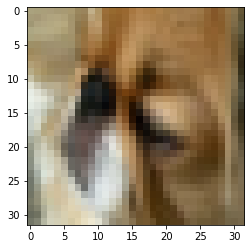

Номер класса:  [5]
Тип объекта:  собака


In [69]:
n = 167
plt.imshow(X_train[n])
plt.show()
print("Номер класса: ", y_train[n])
print("Тип объекта: ", classes[y_train[n][0]])

Нормализуем данные

In [70]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Преобразуем правильные ответы в формат one hot encoding

In [71]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

**Создаём нейронную сеть**

In [72]:
# Создаём последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32,(3,3), padding='same', input_shape=(32,32,3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32,(3,3), padding='same', activation = 'relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2,2)))
# Слой регуляризации
model.add(Dropout(0.25))
# Третий сверточный слой
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3,3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2,2)))
# Слой регуляризации
model.add(Dropout(0.25))
# Слой преобразования данных с понижением размерности
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

Печатаем информацию о сети

In [73]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

Компилируем модель

In [74]:
from keras.optimizers.optimizer_v1 import Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Обучение нейронной сети

In [75]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2)

Epoch 1/25
352/352 - 6s - loss: 1.6210 - accuracy: 0.4083 - val_loss: 1.2295 - val_accuracy: 0.5620 - 6s/epoch - 18ms/step
Epoch 2/25
352/352 - 4s - loss: 1.1949 - accuracy: 0.5759 - val_loss: 0.9927 - val_accuracy: 0.6396 - 4s/epoch - 12ms/step
Epoch 3/25
352/352 - 4s - loss: 1.0172 - accuracy: 0.6385 - val_loss: 0.8578 - val_accuracy: 0.7026 - 4s/epoch - 12ms/step
Epoch 4/25
352/352 - 4s - loss: 0.9038 - accuracy: 0.6817 - val_loss: 0.7878 - val_accuracy: 0.7260 - 4s/epoch - 12ms/step
Epoch 5/25
352/352 - 5s - loss: 0.8162 - accuracy: 0.7126 - val_loss: 0.7268 - val_accuracy: 0.7440 - 5s/epoch - 14ms/step
Epoch 6/25
352/352 - 4s - loss: 0.7537 - accuracy: 0.7353 - val_loss: 0.7569 - val_accuracy: 0.7412 - 4s/epoch - 12ms/step
Epoch 7/25
352/352 - 4s - loss: 0.7004 - accuracy: 0.7545 - val_loss: 0.6741 - val_accuracy: 0.7686 - 4s/epoch - 12ms/step
Epoch 8/25
352/352 - 4s - loss: 0.6548 - accuracy: 0.7692 - val_loss: 0.6430 - val_accuracy: 0.7812 - 4s/epoch - 13ms/step
Epoch 9/25
352/3

Оцениваем качество обучения сети

In [76]:
scores=model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %2f%%"%(scores[1]*100))

Точность работы на тестовых данных: 79.930001%


Графически

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


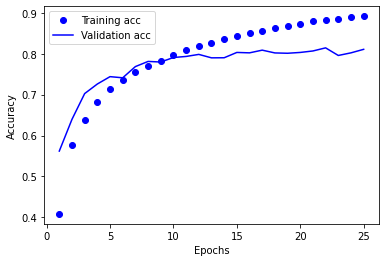

In [77]:
history_dict = history.history
print(history_dict.keys())
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Сохраняем обученную нейронную сеть


In [78]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights('cifar10_model.h5')

In [79]:
!ls

cifar10_model.h5  cifar10_model.json  frog.png	sample_data  ship.png


In [80]:
from google.colab import files

In [81]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
files.download("cifar10_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Применяем сеть для распознавания объектов на изображениях**

Просмотр изображения из набора данных для тестирования

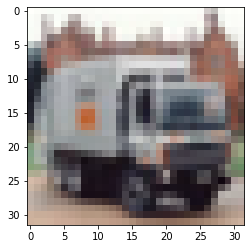

In [83]:
index=11
plt.imshow(X_test[index])
plt.show()

Преобразование тестового изображения

In [84]:
x = X_test[index]
x = np.expand_dims(x,axis=0)

Запуск распознавания

In [85]:
prediction = model.predict(x)

1/1 [==============================] - 0s 83ms/step


Печатаем результаты распознавания

In [86]:
print(prediction)

[[2.5624038e-11 3.7084307e-04 2.4449796e-18 1.7979189e-17 1.5027409e-22
  1.0777508e-18 2.8187834e-19 4.8360549e-21 8.7600496e-11 9.9962914e-01]]


Преобазуем результаты из формата one hot encoding

In [87]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


Печатаем правильный ответ

In [88]:
print(classes[y_test[index][0]])

грузовик


Распознавание дополнительного изображения

In [89]:
 from google.colab import files
 files.upload()

Saving frog.png to frog (1).png


{'frog.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x02\x00\x00\x00{\x1aC\xad\x00\x00\x17\xcfIDATx\x01\xed\xdd\xb1\x8e\x1ce\xda\x05\xe0\x01\x91"\xed \x82M\xd0\xa6\xc6rb\x11`\x12"\xef\x15p\x07d\x96\x80;\xd8h\xc3\r\xd7\x923\xee\x80;pDb\'\x96\x83\xb5\x0c9\xc9\x06+f%rk\xb5 \xa1\xb6T_\x0f5S\xdd\xa7\xaa\xce\xf3GCwM\xbf\xf5>\xe7\xfbu\xb6\xa5\xee\xf1;\x9f>\xfe\xe6\xc2\xff\x11 @\x80@\x9f\xc0\xbb}+\xdb\x98\x00\x01\x02\x04\xfe/\xa0\x00\x9c\x03\x02\x04\x08\x94\n(\x80\xd2\xe0\xadM\x80\x00\x01\x05\xe0\x0c\x10 @\xa0T@\x01\x94\x06om\x02\x04\x08(\x00g\x80\x00\x01\x02\xa5\x02\n\xa04xk\x13 @@\x018\x03\x04\x08\x10(\x15P\x00\xa5\xc1[\x9b\x00\x01\x02\n\xc0\x19 @\x80@\xa9\x80\x02(\r\xde\xda\x04\x08\x10P\x00\xce\x00\x01\x02\x04J\x05\x14@i\xf0\xd6&@\x80\x80\x02p\x06\x08\x10 P*\xa0\x00J\x83\xb76\x01\x02\x04\x14\x803@\x80\x00\x81R\x01\x05P\x1a\xbc\xb5\t\x10 \xa0\x00\x9c\x01\x02\x04\x08\x94\n(\x80\xd2\xe0\xadM\x80\x00\x01\x05\xe0\x0c\x10 @\xa0T@\x01\x94\x06om\x02\x04\x08(\x00g\x

Проверяем загрузку файлов

In [90]:
!ls

 cifar10_model.h5    'frog (1).png'   sample_data
 cifar10_model.json   frog.png	      ship.png


Смотрим загруженную картинку

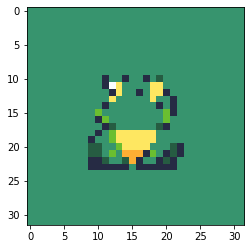

In [92]:
img_path = 'frog.png'
img = tf.keras.utils.load_img(img_path, target_size=(32, 32))
img_arr = np.array(img)
plt.imshow(img_arr)
plt.show()

In [93]:
img_arr = img_arr.astype('float32')
img_arr /= 255

In [94]:
my_x = img_arr
my_x = np.expand_dims(my_x, axis=0)

In [95]:
prediction = model.predict(my_x)

1/1 [==============================] - 0s 21ms/step


In [96]:
print(prediction)

[[1.3217206e-02 5.2192120e-04 6.0302014e-03 2.4568082e-03 5.3251901e-05
  2.6380052e-04 9.0830910e-01 1.0579365e-07 6.8681918e-02 4.6572546e-04]]


In [97]:
prediction = np.argmax(prediction)

In [98]:
print(classes[prediction])

лягушка
